<a href="https://colab.research.google.com/github/PeterG2001/Projects-/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

np.random.seed(50)

K means 

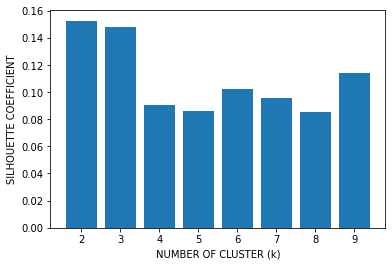

Silhouette score for K-means= 2: 0.15252776165336188
Silhouette score for K-means= 3: 0.14794791859824125
Silhouette score for K-means= 4: 0.09070136657790466
Silhouette score for K-means= 5: 0.08608267989426284
Silhouette score for K-means= 6: 0.10192354390737239
Silhouette score for K-means= 7: 0.09551291377684556
Silhouette score for K-means= 8: 0.08505342699895191
Silhouette score for K-means= 9: 0.1142951492444905
Optimal number of clusters: 2


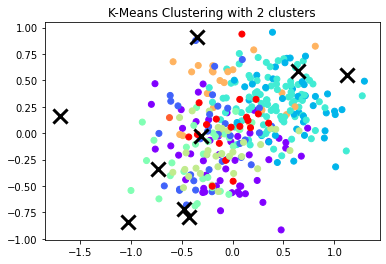

In [ ]:
class KMeansClustering:
    def __init__(self, k, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None
        
    def fit(self, X):
        n_samples, n_features = X.shape
        
        # Z-score normalization
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        
        # Initialize K centroids randomly
        self.centroids = X[random.sample(range(n_samples), self.k)]
        
        for i in range(self.max_iter):
            # Assign each data point to its nearest centroid
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            self.labels = np.argmin(distances, axis=0)
            
            # Update the centroid to the mean of all the points assigned to it
            for j in range(self.k):
                self.centroids[j] = np.mean(X[self.labels == j], axis=0)
        
        # Return the final K centroids and their corresponding labels
        return self.centroids, self.labels

class SilhouetteCoefficient:
    def __init__(self):
        self.silhouette_scores = None
    
    def score_samples(self, X, labels):
        n_samples = X.shape[0]
        self.silhouette_scores = np.zeros(n_samples)
        
        # Compute a(i) for each data point
        for i in range(n_samples):
            a_i = np.mean(np.sqrt(np.sum((X - X[i])**2, axis=1))[labels == labels[i]])

            # Compute b(i) for each data point
            b_i = np.inf
            for j in set(labels) - set([labels[i]]):
                dist_j = np.sqrt(np.sum((X - X[i])**2, axis=1))[labels == j]
                if len(dist_j) > 0:
                    b_i = min(b_i, np.mean(dist_j))

            # Compute silhouette coefficient for each data point
            if b_i == np.inf or b_i == 0:
                self.silhouette_scores[i] = 0
            else:
                self.silhouette_scores[i] = (b_i - a_i) / max(a_i, b_i)

        return self.silhouette_scores

class KMeansClusteringEvaluator:
    def __init__(self, k_values, max_iter=100):
        self.k_values = k_values
        self.max_iter = max_iter
        self.silhouette_scores = None
        
    def evaluate(self, X):
        self.silhouette_scores = []
        for k in self.k_values:
            kmeans = KMeansClustering(k, self.max_iter)
            centroids, labels = kmeans.fit(X)
            score = SilhouetteCoefficient().score_samples(X, labels)
            self.silhouette_scores.append(np.mean(score))
        
        # Plot the results
        fig, ax = plt.subplots()
        ax.bar(k_values, self.silhouette_scores)
        ax.set_xlabel('NUMBER OF CLUSTER (k)')
        ax.set_ylabel('SILHOUETTE COEFFICIENT')
        ax.set_xticks(k_values)
        plt.show()
        
       
        # Printing the silhoutte score for each k value of 2-9

        for k, score in zip(k_values, self.silhouette_scores):
          print(f'Silhouette score for K-means= {k}: {score}')
           
        # Return the optimal number of clusters
        return self.k_values[np.argmax(self.silhouette_scores)]



# Read data from CSV file
df = pd.read_csv('dataset', delimiter=' ', header=None, index_col=0)
feature_array = df.to_numpy()

# Create KMeansClustering instance and fit the data
kmeans = KMeansClustering(9)
centroids, labels = kmeans.fit(feature_array)

# Compute the optimal number of clusters using SilhouetteCoefficientEvaluator
k_values = range(2, 10)
evaluator = KMeansClusteringEvaluator(k_values)
optimal_k = evaluator.evaluate(feature_array)

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_k)

# Plot the final clustering

plt.scatter(feature_array[:, 0], feature_array[:, 1], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='black')
plt.title("K-Means Clustering with {} clusters".format(optimal_k))
plt.show()



K means ++

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


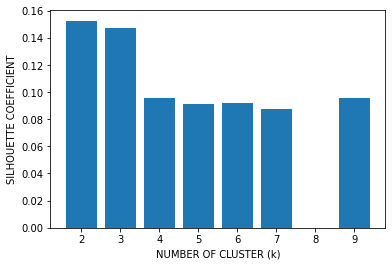

Silhouette score for K-means= 2: 0.15252776165336188
Silhouette score for K-means= 3: 0.1468463164849784
Silhouette score for K-means= 4: 0.09573045877561583
Silhouette score for K-means= 5: 0.09124189062755259
Silhouette score for K-means= 6: 0.09219087789562892
Silhouette score for K-means= 7: 0.08755482812920656
Silhouette score for K-means= 8: 0.0
Silhouette score for K-means= 9: 0.0956532697972468
Optimal number of clusters: 2


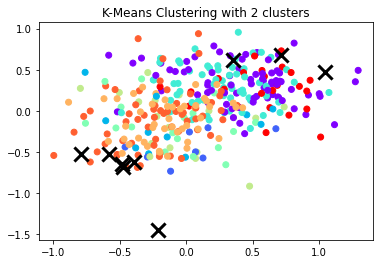

In [ ]:
class KMeansClustering:
    def __init__(self, k, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None
        
    def _initialize_centroids(self, X):
        n_samples, n_features = X.shape
        self.centroids = np.zeros((self.k, n_features))

        # Select the first centroid randomly
        self.centroids[0] = X[np.random.choice(n_samples)]

        # Calculate the distance of each point to the nearest centroid
        distances = np.zeros(n_samples)
        for i in range(1, self.k):
            for j in range(n_samples):
                distances[j] = self._distance_to_nearest_centroid(X[j])

            # Replace negative distances with a very large value
            distances[distances < 0] = np.inf

            # Choose the next centroid with probability proportional to its distance from the closest centroid
            if np.all(distances == 0):
                probs = np.full(n_samples, 1/n_samples)
            else:
                probs = distances**2 / np.sum((distances)**2)

            # Replace negative or zero values in probs array with a small positive value
            probs[probs <= 0] = 1e-8

            # Normalize the probabilities to sum up to 1
            probs /= np.sum(probs)

            self.centroids[i] = X[np.random.choice(n_samples, p=probs)]


    def _distance_to_nearest_centroid(self, x):
        distances = np.sqrt(np.sum((x - self.centroids - x)**2, axis=1))
        return np.min(distances)

    def fit(self, X):
        n_samples, n_features = X.shape

        # Z-score normalization
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

        # Initialize K centroids using KMeans++
        self._initialize_centroids(X)

        for i in range(self.max_iter):
            # Assign each data point to its nearest centroid
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            self.labels = np.argmin(distances, axis=0)

            # Update the centroid to the mean of all the points assigned to it
            for j in range(self.k):
                self.centroids[j] = np.mean(X[self.labels == j], axis=0)

        # Return the final K centroids and their corresponding labels
        return self.centroids, self.labels



class SilhouetteCoefficient:
    def __init__(self):
        self.silhouette_scores = None
    
    def score_samples(self, X, labels):
        n_samples = X.shape[0]
        self.silhouette_scores = np.zeros(n_samples)
        
        # Compute a(i) for each data point
        for i in range(n_samples):
            a_i = np.mean(np.sqrt(np.sum((X - X[i])**2, axis=1))[labels == labels[i]])

            # Compute b(i) for each data point
            b_i = np.inf
            for j in set(labels) - set([labels[i]]):
                dist_j = np.sqrt(np.sum((X - X[i])**2, axis=1))[labels == j]
                if len(dist_j) > 0:
                    b_i = min(b_i, np.mean(dist_j))

            # Compute silhouette coefficient for each data point
            if b_i == np.inf or b_i == 0:
                self.silhouette_scores[i] = 0
            else:
                self.silhouette_scores[i] = (b_i - a_i) / max(a_i, b_i)

        return self.silhouette_scores

class KMeansClusteringEvaluator:
    def __init__(self, k_values, max_iter=100):
        self.k_values = k_values
        self.max_iter = max_iter
        self.silhouette_scores = None
        
    def evaluate(self, X):
        self.silhouette_scores = []
        for k in self.k_values:
            kmeans = KMeansClustering(k, self.max_iter)
            centroids, labels = kmeans.fit(X)
            score = SilhouetteCoefficient().score_samples(X, labels)
            self.silhouette_scores.append(np.mean(score))

        # Plot the results
        fig, ax = plt.subplots()
        ax.bar(k_values, self.silhouette_scores)
        ax.set_xlabel('NUMBER OF CLUSTER (k)')
        ax.set_ylabel('SILHOUETTE COEFFICIENT')
        ax.set_xticks(k_values)
        plt.show()

        # Printing the silhoutte score for each k value of 2-9

        for k, score in zip(k_values, self.silhouette_scores):
          print(f'Silhouette score for K-means= {k}: {score}')
        
        
        # Return the optimal number of clusters
        return self.k_values[np.argmax(self.silhouette_scores)]



# Read data from CSV file
df = pd.read_csv('dataset', delimiter=' ', header=None, index_col=0)
feature_array = df.to_numpy()

# Create KMeansClustering instance and fit the data
kmeans = KMeansClustering(9)
centroids, labels = kmeans.fit(feature_array)

# Compute the optimal number of clusters using SilhouetteCoefficientEvaluator
k_values = range(2, 10)
evaluator = KMeansClusteringEvaluator(k_values)
optimal_k = evaluator.evaluate(feature_array)

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_k)

# Plot the final clustering
plt.scatter(feature_array[:, 0], feature_array[:, 1], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='black')
plt.title("K-Means Clustering with {} clusters".format(optimal_k))
plt.show()


KMeans Bisection Search 

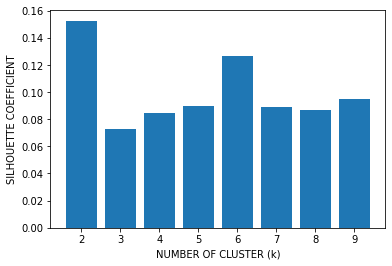

Silhouette score for K-means= 2: 0.15252776165336188
Silhouette score for K-means= 3: 0.07246833148112243
Silhouette score for K-means= 4: 0.08482264297331762
Silhouette score for K-means= 5: 0.08980838612279053
Silhouette score for K-means= 6: 0.12661561901462462
Silhouette score for K-means= 7: 0.08934000478545141
Silhouette score for K-means= 8: 0.08687120329559526
Silhouette score for K-means= 9: 0.09461659359362226
Optimal number of clusters: 2


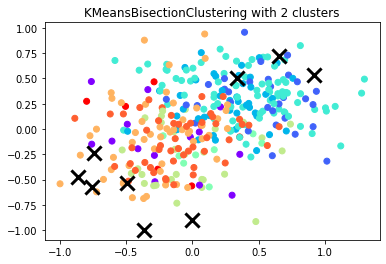

In [ ]:
class KMeansBisectionClustering:
    def __init__(self, k, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None
    
    def fit(self, X):
        n_samples, n_features = X.shape
        
        # Z-score normalization
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        
        # Initialize one centroid using the mean of all data points
        self.centroids = np.mean(X, axis=0)[np.newaxis, :]
        
        for i in range(self.k - 1):
            # Compute distances from each data point to the current centroids
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            
            # Assign each data point to the closest centroid
            closest_centroid = np.argmin(distances, axis=0)
            
            # Split the cluster with the largest SSE
            max_sse = -1
            for j in range(self.centroids.shape[0]):
                sse = np.sum((X[closest_centroid == j] - self.centroids[j])**2)
                if sse > max_sse:
                    max_sse = sse
                    max_centroid_idx = j
            
            # Compute the new centroid for the split cluster
            new_centroid = np.mean(X[closest_centroid == max_centroid_idx], axis=0)
            
            # Add the new centroid to the centroids array
            self.centroids = np.insert(self.centroids, max_centroid_idx + 1, new_centroid, axis=0)
        
        for i in range(self.max_iter):
            # Assign each data point to its nearest centroid
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            self.labels = np.argmin(distances, axis=0)
            
            # Update the centroid to the mean of all the points assigned to it
            for j in range(self.k):
                self.centroids[j] = np.mean(X[self.labels == j], axis=0)
        
        # Return the final K centroids and their corresponding labels
        return self.centroids, self.labels


class SilhouetteCoefficient:
    def __init__(self):
        self.silhouette_scores = None
    
    def score_samples(self, X, labels):
        n_samples = X.shape[0]
        self.silhouette_scores = np.zeros(n_samples)
        
        # Compute a(i) for each data point
        for i in range(n_samples):
            a_i = np.mean(np.sqrt(np.sum((X - X[i])**2, axis=1))[labels == labels[i]])

            # Compute b(i) for each data point
            b_i = np.inf
            for j in set(labels) - set([labels[i]]):
                dist_j = np.sqrt(np.sum((X - X[i])**2, axis=1))[labels == j]
                if len(dist_j) > 0:
                    b_i = min(b_i, np.mean(dist_j))

            # Compute silhouette coefficient for each data point
            if b_i == np.inf or b_i == 0:
                self.silhouette_scores[i] = 0
            else:
                self.silhouette_scores[i] = (b_i - a_i) / max(a_i, b_i)

        return self.silhouette_scores


class KMeansBisectionClusteringEvaluator:
    def __init__(self, k_values, max_iter=100):
        self.k_values = k_values
        self.max_iter = max_iter
        self.silhouette_scores = None
        
    def evaluate(self, X):
        self.silhouette_scores = []
        for k in self.k_values:
            kmeans = KMeansBisectionClustering(k, self.max_iter)
            centroids, labels = kmeans.fit(X)
            score = SilhouetteCoefficient().score_samples(X, labels)
            self.silhouette_scores.append(np.mean(score))
        
        # Plot the results
        fig, ax = plt.subplots()
        ax.bar(k_values, self.silhouette_scores)
        ax.set_xlabel('NUMBER OF CLUSTER (k)')
        ax.set_ylabel('SILHOUETTE COEFFICIENT')
        ax.set_xticks(k_values)
        plt.show()


        # Printing the silhoutte score for each k value of 2-9

        for k, score in zip(k_values, self.silhouette_scores):
          print(f'Silhouette score for K-means= {k}: {score}')

        
        
        # Return the optimal number of clusters
        return self.k_values[np.argmax(self.silhouette_scores)]



# Read data from CSV file
df = pd.read_csv('dataset', delimiter=' ', header=None, index_col=0)
feature_array = df.to_numpy()

# Create KMeansClustering instance and fit the data
kmeans = KMeansBisectionClustering(9)
centroids, labels = kmeans.fit(feature_array)

# Compute the optimal number of clusters using SilhouetteCoefficientEvaluator
k_values = range(2, 10)
evaluator = KMeansBisectionClusteringEvaluator(k_values)
optimal_k = evaluator.evaluate(feature_array)

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_k)

# Plot the final clustering
plt.scatter(feature_array[:, 0], feature_array[:, 1], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='black')
plt.title("KMeansBisectionClustering with {} clusters".format(optimal_k))
plt.show()

    